In [5]:
from EhrenfestAnalysis import EhrenfestAnalysis

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider

%matplotlib widget

In [2]:
analysis = EhrenfestAnalysis()
directory = "/Users/brynlloyd/Developer/Coding/Python/dft/gpaw/my_own_stopping/data/322_hyperchannelling_hydrogen/"
name = analysis.initialise_analysis(directory)
energy = "40 keV"
analysis.set_energies(name, [energy])
analysis.set_timesteps(name, "::10")
analysis.load_gpw_data(name)

/Users/brynlloyd/Developer/Coding/Python/dft/gpaw/my_own_stopping/env/lib/python3.9/site-packages/gpaw/wavefunctions/base.py:572: ComplexWarning: Casting complex values to real discards the imaginary part
  kpt.projections.matrix.array[:] = P_nI


/Users/brynlloyd/Developer/Coding/Python/dft/gpaw/my_own_stopping/data/322_hyperchannelling_hydrogen/
{
    "20 keV": [
        "Al_stopping_20k_step1.gpw",
        "Al_stopping_20k_step2.gpw",
        "Al_stopping_20k_step3.gpw",
        "Al_stopping_20k_step4.gpw",
        "Al_stopping_20k_step5.gpw",
        "Al_stopping_20k_step6.gpw",
        "Al_stopping_20k_step7.gpw",
        "Al_stopping_20k_step8.gpw",
        "Al_stopping_20k_step9.gpw",
        "Al_stopping_20k_step10.gpw",
        "Al_stopping_20k_step11.gpw",
        "Al_stopping_20k_step12.gpw",
        "Al_stopping_20k_step13.gpw",
        "Al_stopping_20k_step14.gpw",
        "Al_stopping_20k_step15.gpw",
        "Al_stopping_20k_step16.gpw",
        "Al_stopping_20k_step17.gpw",
        "Al_stopping_20k_step18.gpw",
        "Al_stopping_20k_step19.gpw",
        "Al_stopping_20k_step20.gpw",
        "Al_stopping_20k_step21.gpw",
        "Al_stopping_20k_step22.gpw",
        "Al_stopping_20k_step23.gpw",
        "Al_sto

In [3]:
projectile_positions = np.array([atoms.get_positions()[-1] for atoms in analysis.data_handlers[name].atoms_dict[energy]])
electron_densities = [calc.get_all_electron_density() for calc in analysis.data_handlers[name].calc_dict[energy]]

In [67]:
def find_projectile(projectile_positions, electron_densities, check=False):
    im_size = 10
    projectile_position_indices = np.array([(projectile_position % cell[0]) / cell * np.shape(electron_density) for projectile_position in projectile_positions], dtype="int64")

    if check == False:
        return projectile_position_indices

    fig,ax = plt.subplots(figsize=(5,5))
    plt.subplots_adjust(bottom=0.25)

    def get_image(timestep, slice_position):
        projectile_position_index = projectile_position_indices[timestep]
        # print(projectile_position_index)

        # print(f"""{projectile_position_index[0] - im_size} : {projectile_position_index[0] + im_size},
        #                           {projectile_position_index[1]},
        #                           {projectile_position_index[2] - im_size} : {projectile_position_index[2] + im_size}""")

        return electron_densities[timestep][projectile_position_index[0] - im_size : projectile_position_index[0] + im_size,
                                            slice_position,
                                            projectile_position_index[2] - im_size : projectile_position_index[2] + im_size]

    im_data = get_image(0, projectile_position_indices[0][1])
    im = ax.imshow(im_data)
    cbar = plt.colorbar(im)

    ax_slider_ts = plt.axes([0.2, 0.1, 0.6, 0.03])
    slider_ts = Slider(ax_slider_ts,
                    "timestep slider",
                    valmin = 0,
                    valmax = len(electron_densities)-1,
                    valinit = 0,
                    valstep = 1)

    ax_slider_sl = plt.axes([0.2, 0.01, 0.6, 0.03])
    slider_sl = Slider(ax_slider_sl,
                    "slice slider",
                    valmin = -im_size,
                    valmax = im_size,
                    valinit = 0,
                    valstep = 1)
        

    def update(val):
        timestep = int(slider_ts.val)
        slice_position = int(slider_sl.val)
        print(timestep, slice_position)
        new_image = get_image(timestep, slice_position)
        im.set_data(new_image)
        # im.set_clim(vmin = np.min(new_image),
                    # vmax = np.max(new_image))
        # im.set_clim(vmin=0, vmax=1.5)
        fig.canvas.draw_idle()

    slider_ts.on_changed(update)
    slider_sl.on_changed(update)
    plt.show()

    return projectile_position_indices

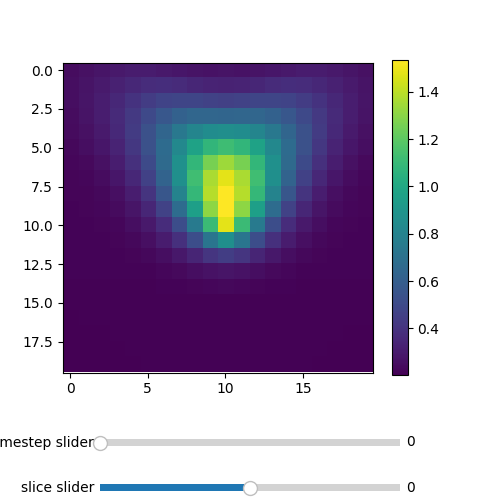

array([[ 36,  40,  40],
       [ 72,  40,  40],
       [108,  40,  40],
       [ 24,  40,  40],
       [ 59,  40,  40],
       [ 95,  40,  40],
       [ 11,  40,  40],
       [ 47,  40,  40],
       [ 83,  40,  40]])

In [68]:
find_projectile(projectile_positions, electron_densities, check=True)

In [11]:
t = 4
electron_density = electron_densities[t]
projectile_position = projectile_positions[t]
cell = np.diag(analysis.data_handlers[name].atoms_dict[energy][0].get_cell())

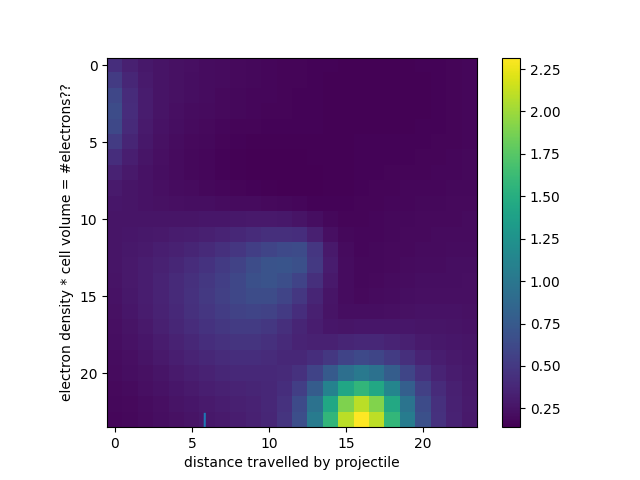

In [142]:
# which index of the electron density array corresponds to the projectile position
projectile_position_index = np.array((projectile_position % cell[0]) / cell * np.shape(electron_density), dtype="int64")


slice_pos = projectile_position_index[1]
im_size = 12

cropped_around_projectile = electron_density[projectile_position_index[0] - im_size : projectile_position_index[0] + im_size,
                                             projectile_position_index[1] - im_size : projectile_position_index[1] + im_size,
                                             projectile_position_index[2] - im_size : projectile_position_index[2] + im_size]



im = plt.imshow(electron_density[projectile_position_index[0] - im_size : projectile_position_index[0] + im_size,
                                 slice_pos,
                                 projectile_position_index[2] - im_size : projectile_position_index[2] + im_size])
plt.colorbar(im)
plt.show()


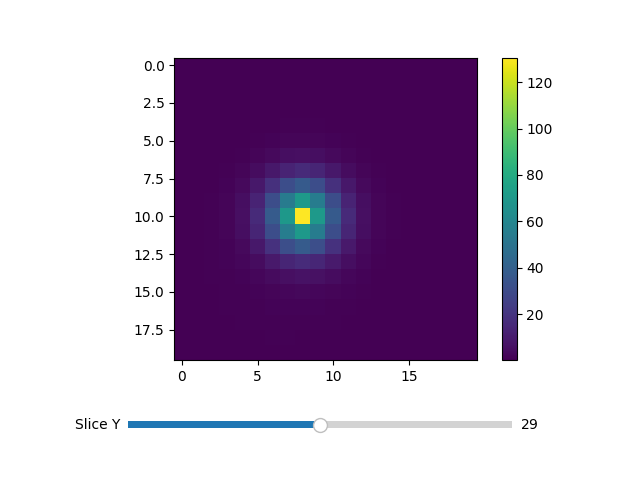

In [101]:
projectile_position_index = np.array(
    (projectile_position % cell[0]) / cell * np.shape(electron_density),
    dtype="int64"
)

im_size_x = 10
im_size_yz = 10
offset = 2

# Set initial slice position
slice_pos_init = projectile_position_index[1]

# Define the bounds for the slider
slice_min = max(0, slice_pos_init - im_size)
slice_max = min(electron_density.shape[1] - 1, slice_pos_init + im_size)

# Create figure and axis
fig, ax = plt.subplots()
plt.subplots_adjust(bottom=0.25)  # leave space at bottom for the slider

# Initial cropped view
def get_cropped(slice_pos):
    return electron_density[
        projectile_position_index[0] - offset - im_size_x : projectile_position_index[0] - offset + im_size_x,
        slice_pos,
        projectile_position_index[2] - im_size_yz : projectile_position_index[2] + im_size_yz
    ]

# Show initial image
im_data = get_cropped(slice_pos_init)
im = ax.imshow(im_data)
cbar = plt.colorbar(im, ax=ax)

# Create slider axis and slider
ax_slider = plt.axes([0.2, 0.1, 0.6, 0.03])
slice_slider = Slider(
    ax_slider,
    'Slice Y',
    valmin=slice_min,
    valmax=slice_max,
    valinit=slice_pos_init,
    valstep=1,
)

# Update function
def update(val):
    slice_pos = int(slice_slider.val)
    im.set_data(get_cropped(slice_pos))
    im.set_clim(vmin=np.min(get_cropped(slice_pos)), vmax=np.max(get_cropped(slice_pos)))  # optional: adjust color scale
    fig.canvas.draw_idle()

slice_slider.on_changed(update)

plt.show()

In [102]:
tot = 0
for i in range(projectile_position_index[0] - im_size, projectile_position_index[0] + im_size):
    for j in range(projectile_position_index[1] - im_size, projectile_position_index[1] + im_size):
        for k in range(projectile_position_index[2] - im_size, projectile_position_index[2] + im_size):
            distance = np.sqrt((i - projectile_position_index[0])**2 + 
                               (j - projectile_position_index[1])**2 + 
                               (k - projectile_position_index[2])**2)


            if distance < 5:
                tot += electron_density[i, j, k]

print(tot)


# cropped_around_projectile

7319.57837102873


In [106]:
np.shape(electron_densities[0])

(240, 80, 80)

In [107]:
im_size = 10
offset = 0

cell = np.diag(analysis.data_handlers[name].atoms_dict[energy][0].get_cell())

grid_size = cell / np.shape(electron_density)

electron_around_projectile = []
for timestep in range(len(electron_densities)):
    electron_density = electron_densities[timestep]
    projectile_position = projectile_positions[timestep]
    projectile_position_index = np.array((projectile_position % cell[0]) / cell * np.shape(electron_density), dtype="int64")
    # print(projectile_position_index)
    if projectile_position_index[0] - offset < im_size:
        electron_around_projectile.append(None)
        continue


    cropped_around_projectile = electron_density[projectile_position_index[0] - offset - im_size : projectile_position_index[0] - offset + im_size,
                                                 projectile_position_index[1] - im_size : projectile_position_index[1] + im_size,
                                                 projectile_position_index[2] - im_size : projectile_position_index[2] + im_size]

    # electron_around_projectile.append(np.sum(cropped_around_projectile))


    tot = 0
    limit = 5
    print(f"integrating a {grid_size[0] * limit:.2f} Angstrom sphere around projectile position")
    if projectile_position_index[0] < im_size or projectile_position_index[0] + im_size > np.shape(electron_density)[0]:
        electron_around_projectile.append(None)
        continue


    i_min = min(projectile_position_index[0] - im_size, 0)
    i_max = min(projectile_position_index[0] + im_size, np.shape(electron_densities[0])[0])

    j_min = min(projectile_position_index[1] - im_size, 0)
    j_max = min(projectile_position_index[1] + im_size, np.shape(electron_densities[0])[1])

    k_min = min(projectile_position_index[2] - im_size, 0)
    k_max = min(projectile_position_index[2] + im_size, np.shape(electron_densities[0])[2])


    for i in range(i_min, i_max):
        for j in range(j_min, j_max):
            for k in range(k_min, k_max):
                distance = np.sqrt((i - projectile_position_index[0])**2 + 
                                (j - projectile_position_index[1])**2 + 
                                (k - projectile_position_index[2])**2)
                if distance < limit:
                    tot += electron_density[i, j, k]
    electron_around_projectile.append(tot)
    
    # im = plt.imshow(electron_density[projectile_position_index[0] - offset - im_size : projectile_position_index[0] - offset + im_size,
    #                                  projectile_position_index[1],
    #                                  projectile_position_index[2] - im_size : projectile_position_index[2] + im_size])
    # plt.colorbar(im)
    # plt.show()

integrating a 0.51 Angstrom sphere around projectile position
integrating a 0.51 Angstrom sphere around projectile position
integrating a 0.51 Angstrom sphere around projectile position
integrating a 0.51 Angstrom sphere around projectile position
integrating a 0.51 Angstrom sphere around projectile position
integrating a 0.51 Angstrom sphere around projectile position
integrating a 0.51 Angstrom sphere around projectile position
integrating a 0.51 Angstrom sphere around projectile position
integrating a 0.51 Angstrom sphere around projectile position
integrating a 0.51 Angstrom sphere around projectile position
integrating a 0.51 Angstrom sphere around projectile position
integrating a 0.51 Angstrom sphere around projectile position
integrating a 0.51 Angstrom sphere around projectile position
integrating a 0.51 Angstrom sphere around projectile position
integrating a 0.51 Angstrom sphere around projectile position
integrating a 0.51 Angstrom sphere around projectile position
integrat

0.5434801892631552


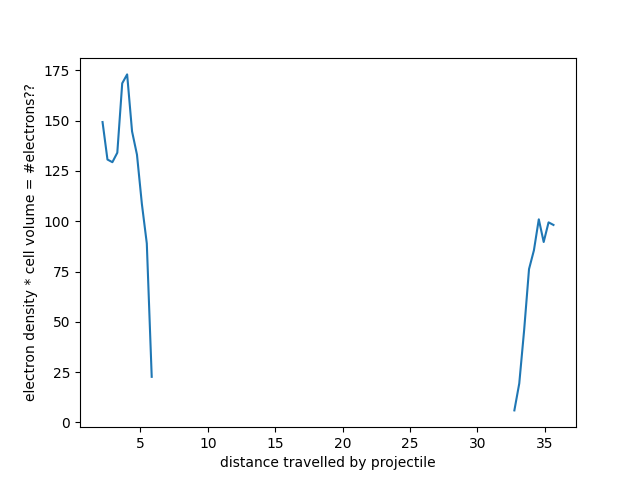

In [141]:
ls = [np.linalg.norm(projectile_position - projectile_positions[0]) for projectile_position in projectile_positions]
cube_size = grid_size[0] * grid_size[1] * grid_size[2]
volume = 4/3 * np.pi * (limit*grid_size[0])**3
print(volume)
electrons = []
for dens in electron_around_projectile:
    electrons.append((dens or 0) * volume)
electrons = [dens if dens > 0 else None for dens in electrons]


fig,ax = plt.subplots()
ax.set_ylabel("electron density * cell volume = #electrons??")
ax.set_xlabel("distance travelled by projectile")
ax.plot(ls, electrons)
plt.show()

In [79]:
print(projectile_positions[:,0] - projectile_positions[0,0])


dist = np.array([np.linalg.norm(projectile_position - projectile_positions[0]) for projectile_position in projectile_positions])
dist

[ 0.          0.36442486  0.72818998  1.09145019  1.45424553  1.81648413
  2.17807013  2.53901937  2.89943807  3.25940944  3.61889633  3.97778631
  4.33601411  4.69362319  5.05072284  5.40737069  5.76350133  6.11901321
  6.47388052  6.82817759  7.18201479  7.53541583  7.88828962  8.24053965
  8.59216646  8.94327131  9.29394925  9.64418028  9.99386091 10.34291848
 10.69137324 11.03932746 11.38686121 11.73393899 12.08044139 12.42630372
 12.77158983 13.11639248 13.46075947 13.80463978 14.14792715 14.49059625
 14.83270695 15.17434441 15.51557021 15.85634334 16.19656352 16.53619157
 16.87527644 17.2139117  17.55215129 17.88992146 18.22712431 18.5637403
 18.89981626 19.23545747 19.57073932 19.90560376 20.23994829 20.57372883
 20.90697367 21.23979306 21.57226442 21.904324   22.23585909 22.566837
 22.89729316 23.22734029 23.55705767 23.88637547 24.21516098 24.54339512
 24.87112825 25.1984699  25.52548997 25.85213229 26.17830385 26.50397693
 26.82916872 27.15396706 27.47842784 27.80251603 28.12

array([ 0.        ,  0.36442486,  0.72818998,  1.09145019,  1.45424553,
        1.81648413,  2.17807013,  2.53901937,  2.89943807,  3.25940944,
        3.61889633,  3.97778631,  4.33601411,  4.69362319,  5.05072284,
        5.40737069,  5.76350133,  6.11901321,  6.47388052,  6.82817759,
        7.18201479,  7.53541583,  7.88828962,  8.24053965,  8.59216646,
        8.94327131,  9.29394925,  9.64418028,  9.99386091, 10.34291848,
       10.69137324, 11.03932746, 11.38686121, 11.73393899, 12.08044139,
       12.42630372, 12.77158983, 13.11639248, 13.46075947, 13.80463978,
       14.14792715, 14.49059625, 14.83270695, 15.17434441, 15.51557021,
       15.85634334, 16.19656352, 16.53619157, 16.87527644, 17.2139117 ,
       17.55215129, 17.88992146, 18.22712431, 18.5637403 , 18.89981626,
       19.23545747, 19.57073932, 19.90560376, 20.23994829, 20.57372883,
       20.90697367, 21.23979306, 21.57226442, 21.904324  , 22.23585909,
       22.566837  , 22.89729316, 23.22734029, 23.55705767, 23.88